AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [1]:
# 1. Import necessary libraries
import pandas as pd
from IPython.display import display, HTML

# 2. Load the Titanic dataset
# Replace 'titanic.csv' with the path to your Titanic dataset file
df = pd.read_csv('titanic.csv')

# 3. Display the first 10 rows
first_10 = df.head(10)

# 4. Display the last 20 rows
last_20 = df.tail(20)

# 5. Print dataset's information
import io
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()

# 6. Describe the dataset
description = df.describe()

# 7. Format the output in a single table-like structure
# Using HTML for better formatting
output = f"""
<h2>First 10 rows</h2>
{first_10.to_html()}

<h2>Last 20 rows</h2>
{last_20.to_html()}

<h2>Dataset Info</h2>
<pre>{info_str}</pre>

<h2>Dataset Description</h2>
{description.to_html()}
"""

# 8. Display the results
display(HTML(output))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


Missing values in each column:
 Age         3
Cabin       5
Embarked    2
Survived    0
Fare        1
dtype: int64


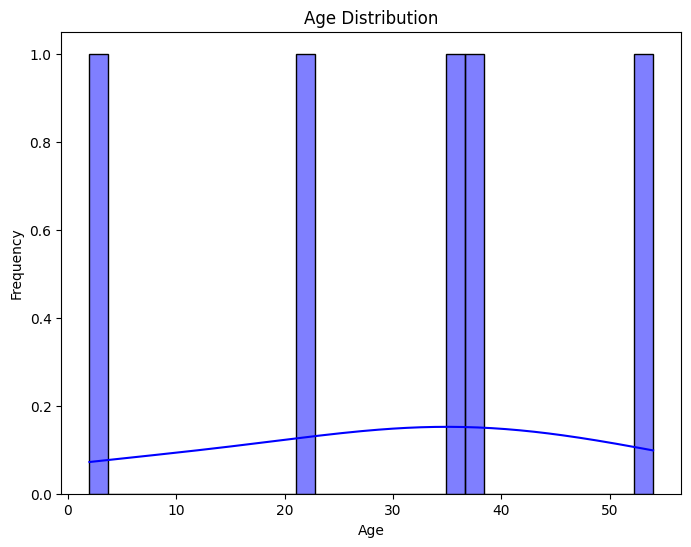

Median of Age: 35.0
Missing values in 'Age' column filled with median.
Missing ratio in 'Cabin' column: 0.625
Missing values in 'Embarked' column filled with mode.
Incorrect data in 'Survived' column handled.
Incorrectly formatted data in 'Fare' column handled and missing values filled with median.

Cleaned DataFrame:
     Age    Cabin Embarked  Survived     Fare
0  22.0      C85        S       1.0   7.2500
1  38.0  Unknown        C       0.0  71.2833
2  35.0  Unknown        S       1.0   9.7958
3  35.0     C123        S       0.0   8.0500
4  35.0  Unknown        S       1.0   8.4583
5  54.0      E46        S       0.0  51.8625
6   2.0  Unknown        C       1.0   9.7958
7  35.0  Unknown        S       1.0  11.1333


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')

data = {
    'Age': [22, 38, np.nan, 35, np.nan, 54, 2, np.nan],
    'Cabin': ['C85', np.nan, np.nan, 'C123', np.nan, 'E46', np.nan, np.nan],
    'Embarked': ['S', 'C', 'S', np.nan, 'S', 'S', 'C', np.nan],
    'Survived': [1, 0, 1, 0, 1, 0, 1, 'yes'],
    'Fare': [7.25, 71.2833, 'unknown', 8.05, 8.4583, 51.8625, np.nan, 11.1333]
}

df = pd.DataFrame(data)

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

age_median = df['Age'].median()
print(f"Median of Age: {age_median}")

df['Age'].fillna(age_median, inplace=True)
print("Missing values in 'Age' column filled with median.")

cabin_missing_ratio = df['Cabin'].isnull().mean()
print(f"Missing ratio in 'Cabin' column: {cabin_missing_ratio}")

if cabin_missing_ratio > 0.5:
    df['Cabin'].fillna('Unknown', inplace=True)
else:
    df.drop(columns=['Cabin'], inplace=True)

embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)
print("Missing values in 'Embarked' column filled with mode.")

df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')
survived_mode = df['Survived'].mode()[0]
df['Survived'].fillna(survived_mode, inplace=True)
print("Incorrect data in 'Survived' column handled.")

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce') 
fare_median = df['Fare'].median()
df['Fare'].fillna(fare_median, inplace=True)
print("Incorrectly formatted data in 'Fare' column handled and missing values filled with median.")

print("\nCleaned DataFrame:\n", df)


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

Number of non-numeric Fare values converted to NaN: 7
Average Fare by Pclass:
 Pclass
1    84.662872
2    20.561977
3    13.685594
Name: Fare, dtype: float64


C:\Users\70892\AppData\Local\Temp\ipykernel_41952\2943052075.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_fare_by_pclass.index, y=average_fare_by_pclass.values, palette='viridis')


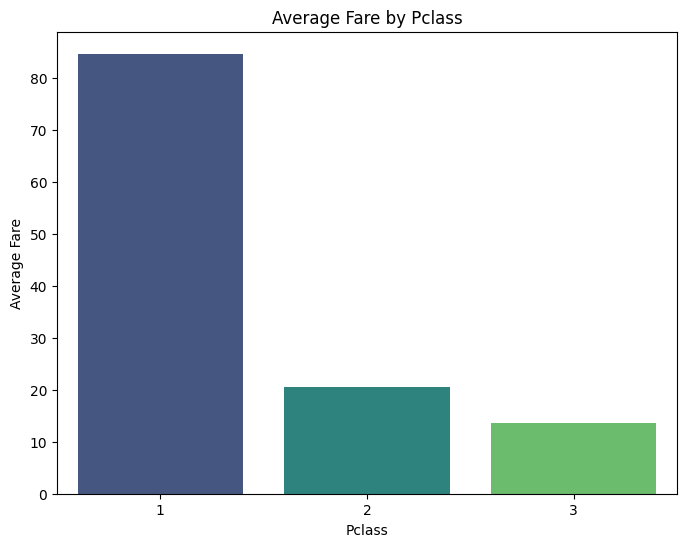

Average Fare by Sex:
 Sex
female    44.456972
male      25.531518
Name: Fare, dtype: float64


C:\Users\70892\AppData\Local\Temp\ipykernel_41952\2943052075.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_fare_by_sex.index, y=average_fare_by_sex.values, palette='magma')


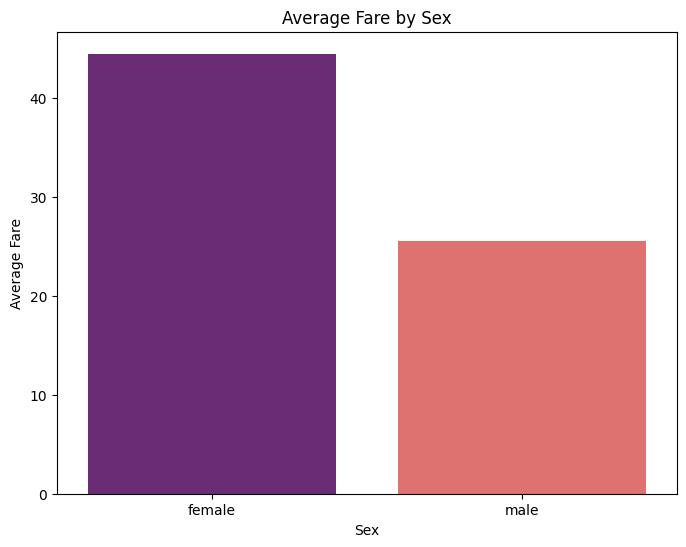

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')

df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

print(f"Number of non-numeric Fare values converted to NaN: {df['Fare'].isnull().sum()}")

average_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print("Average Fare by Pclass:\n", average_fare_by_pclass)

plt.figure(figsize=(8, 6))
sns.barplot(x=average_fare_by_pclass.index, y=average_fare_by_pclass.values, palette='viridis')
plt.title('Average Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Average Fare')
plt.show()

average_fare_by_sex = df.groupby('Sex')['Fare'].mean()
print("Average Fare by Sex:\n", average_fare_by_sex)

plt.figure(figsize=(8, 6))
sns.barplot(x=average_fare_by_sex.index, y=average_fare_by_sex.values, palette='magma')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.show()



AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

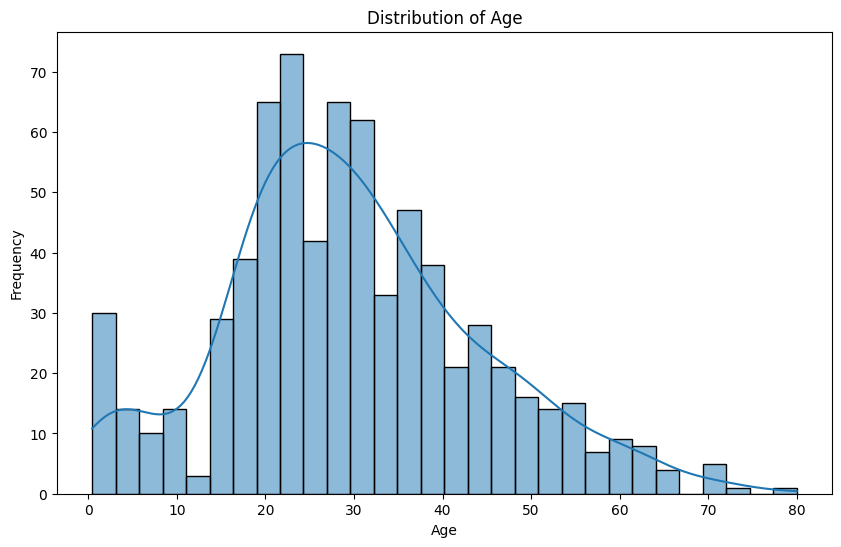

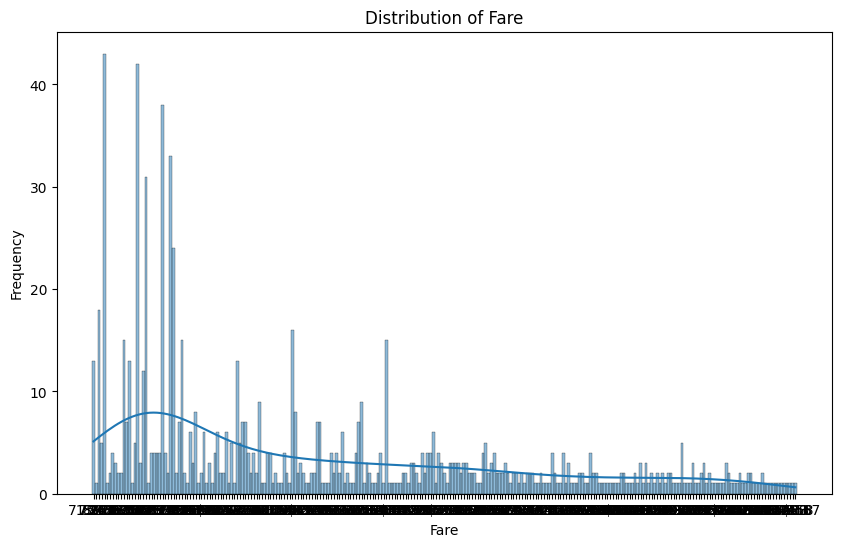

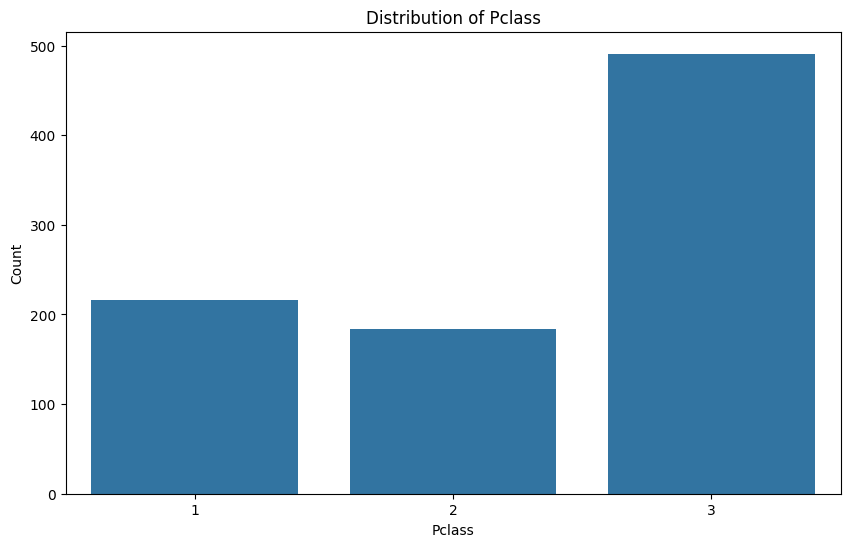

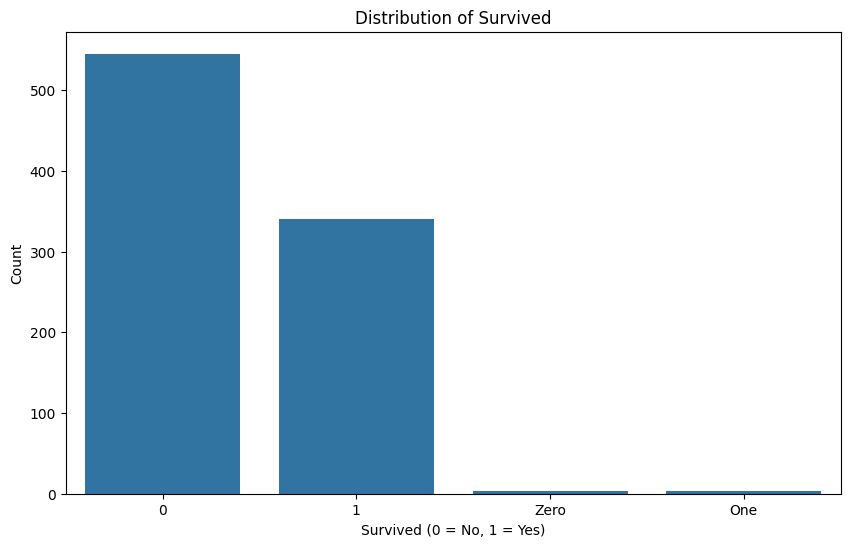

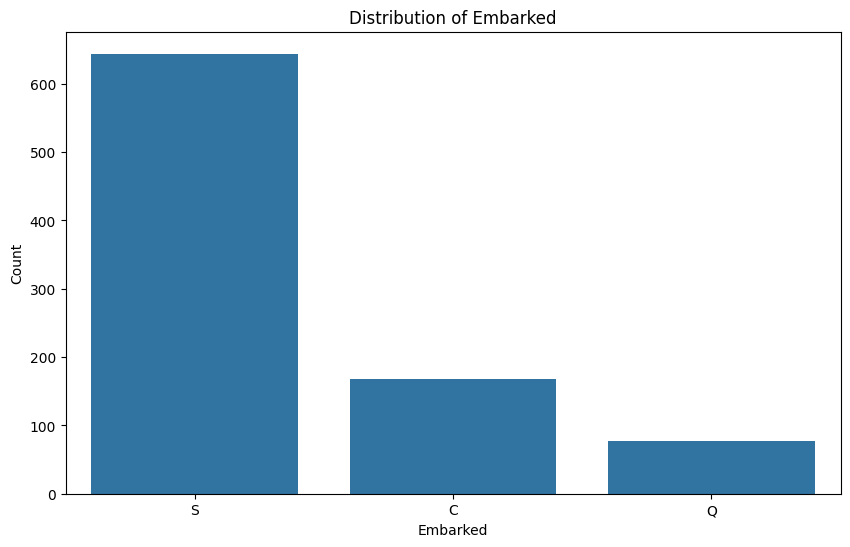

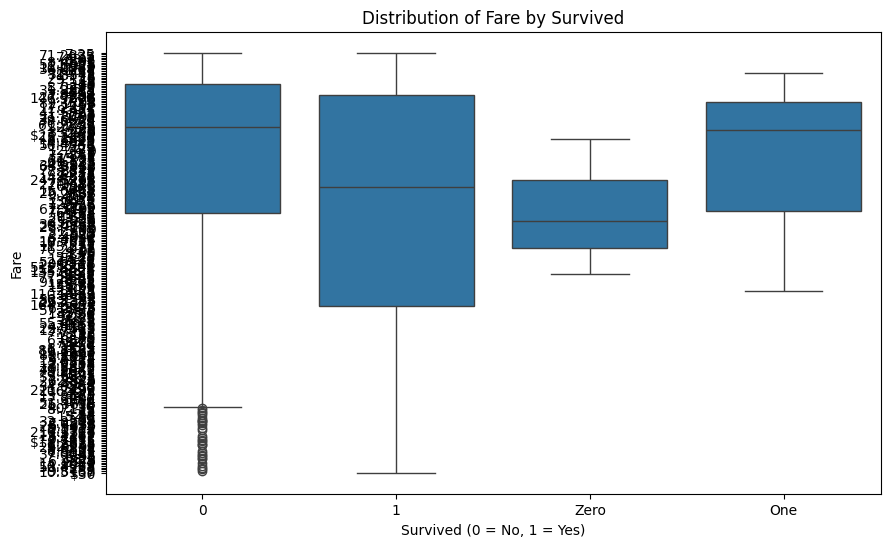

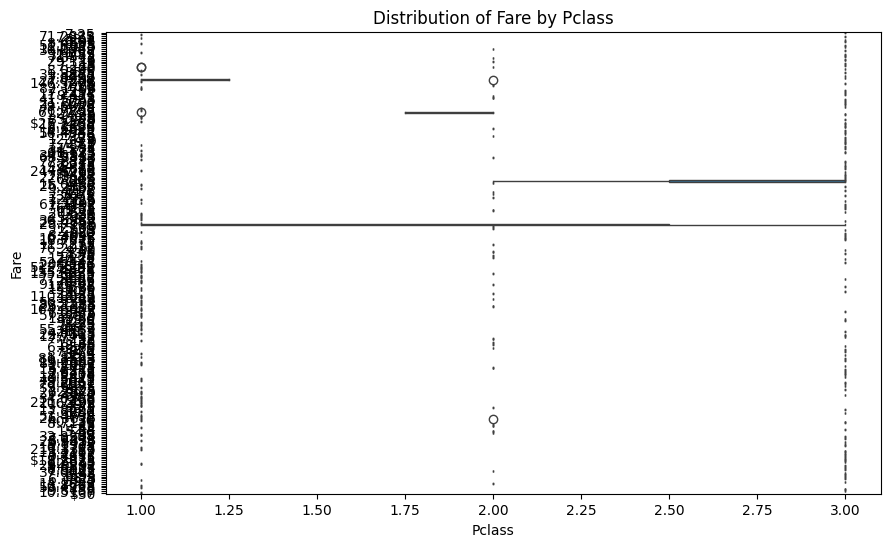

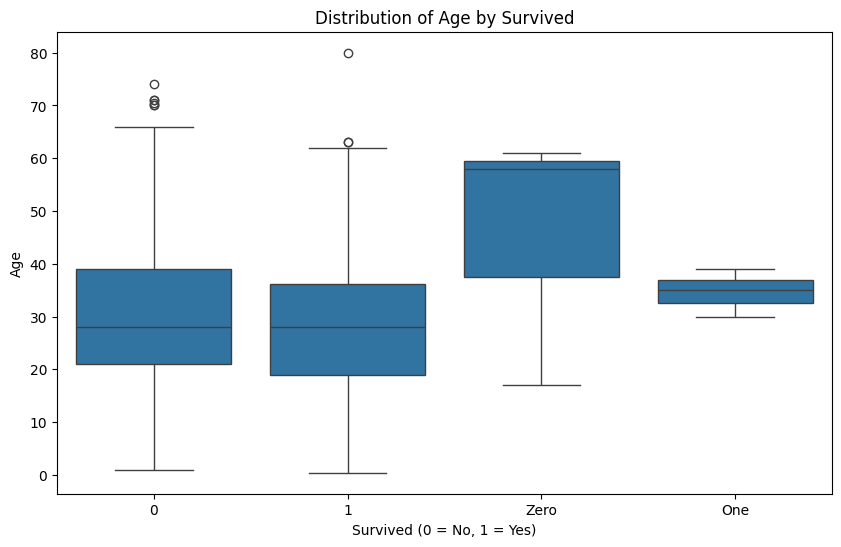

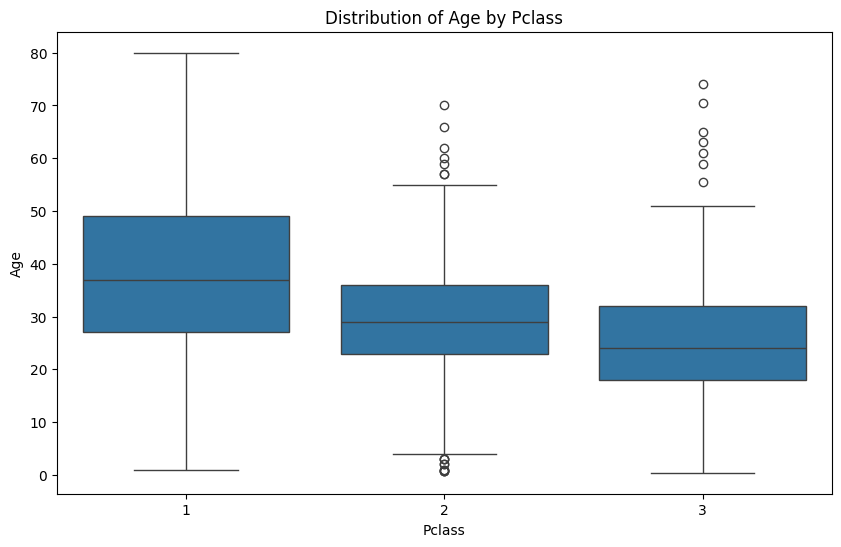

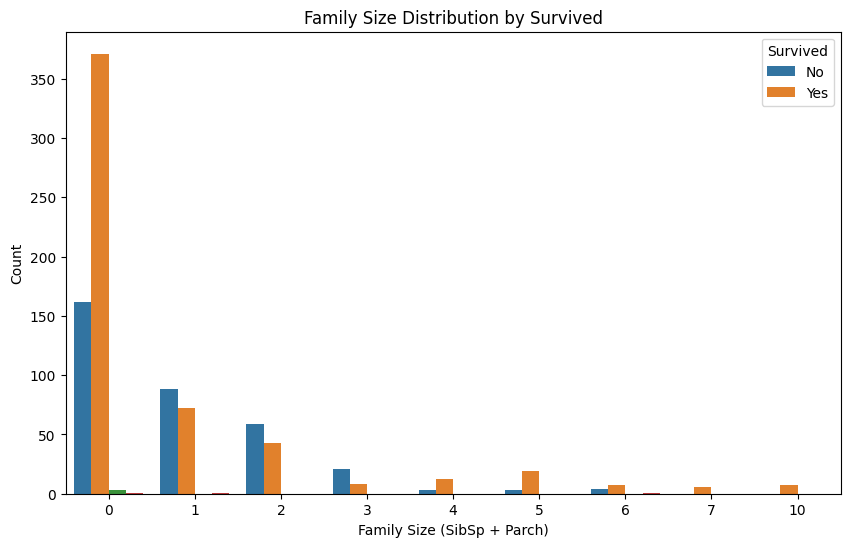

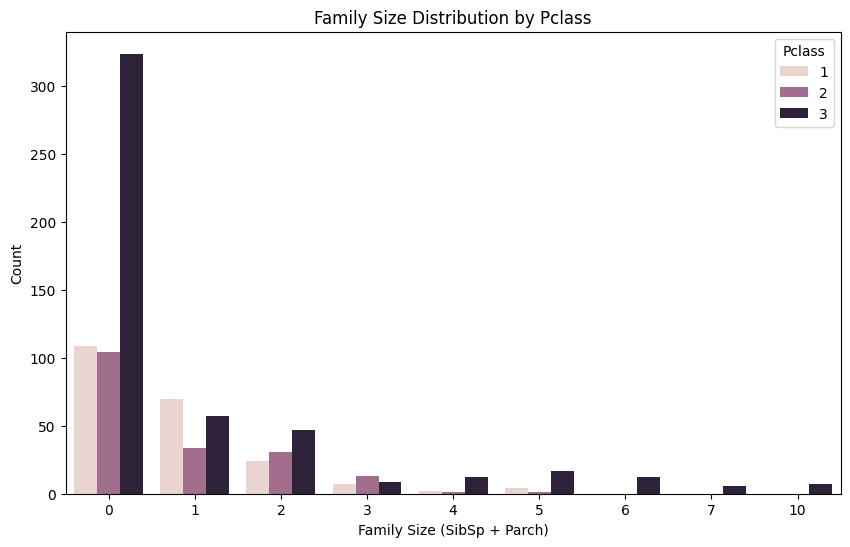

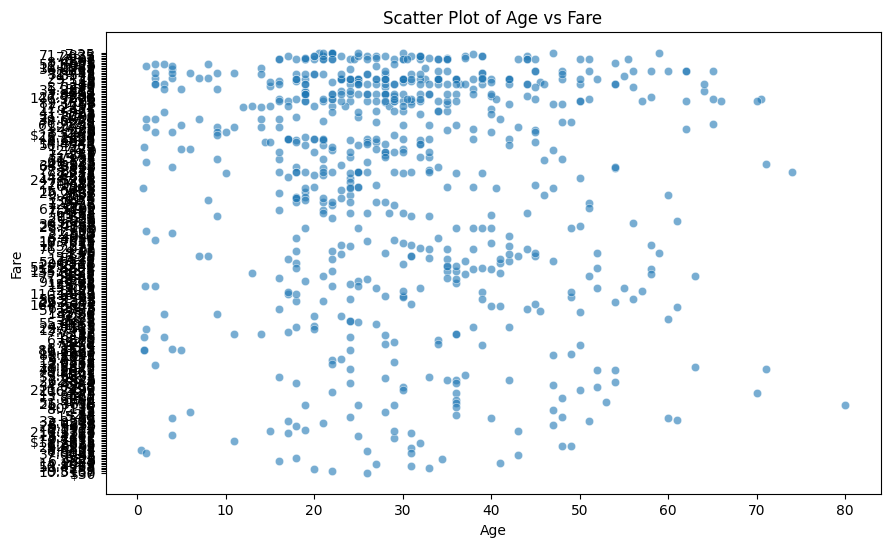

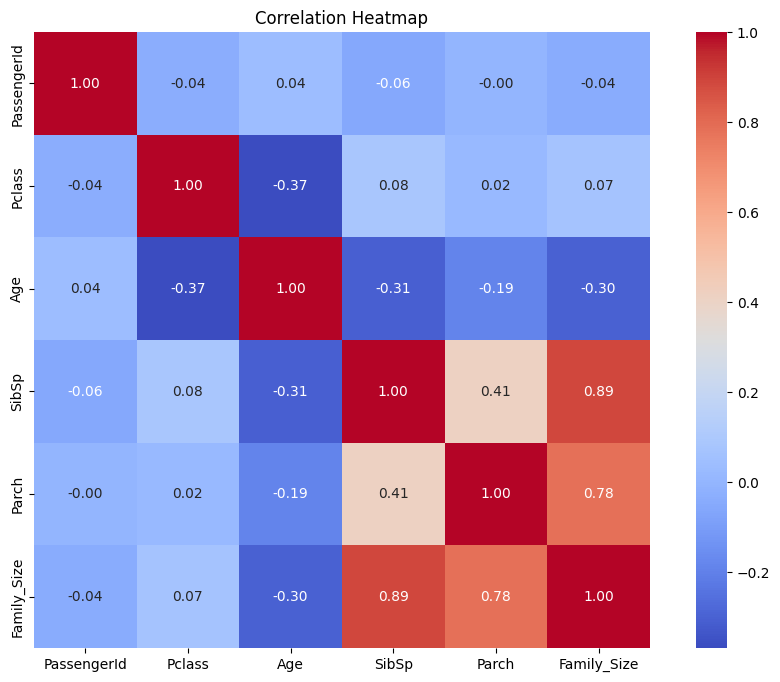

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

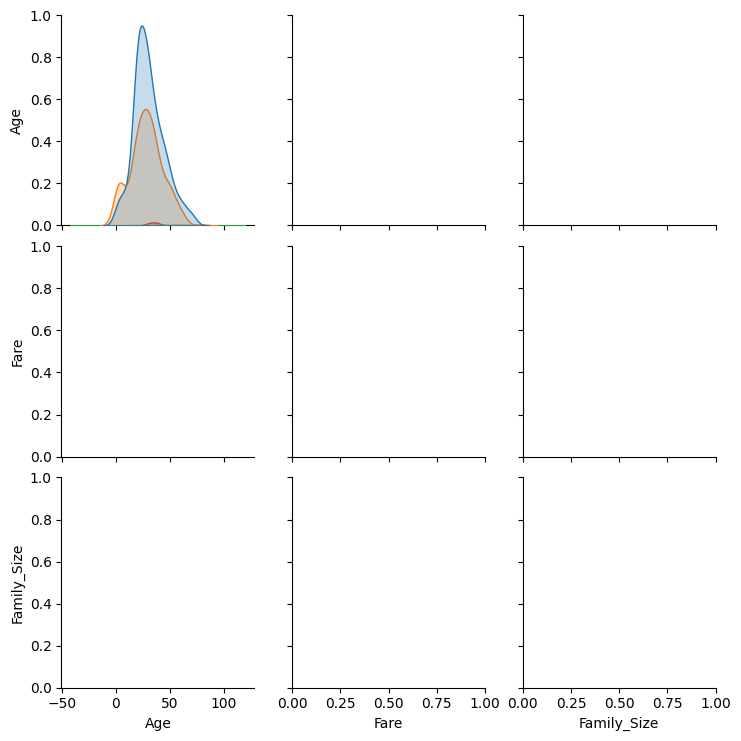

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('E:/桌面/python/NonGradedEX5/titanic.csv')

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=df)
plt.title('Distribution of Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', data=df)
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Distribution of Fare by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Distribution of Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Distribution of Age by Survived')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Distribution of Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

df['Family_Size'] = df['SibSp'] + df['Parch']

plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Size', hue='Survived', data=df)
plt.title('Family Size Distribution by Survived')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Family_Size', hue='Pclass', data=df)
plt.title('Family Size Distribution by Pclass')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df, alpha=0.6)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


sns.pairplot(df, hue='Survived', vars=['Age', 'Fare', 'Family_Size'])
plt.show()


AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

Data types before cleaning:
Age     float64
Fare     object
dtype: object
Unique values in 'Age':
[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Unique values in 'Fare':
['7.25' '71.2833' '7.925' '53.1' '8.05' '8.4583' '51.8625' '21.075'
 '11.1333' '30.0708' '16.7' '26.55' '31.275' '7.8542' '16' '29.125' '13'
 '18' '7.225' '26' '8.0292' '35.5' '31.3875' '263' '7.8792' '7.8958'
 '27.7208' '146.5208' '7.75' '10.5' '82.1708' '52' '7.2292' '11.2417'
 '9.475' '21' '41.5792' '15.5' '21.6792' '17.8' '39.6875' '7.8' '76.

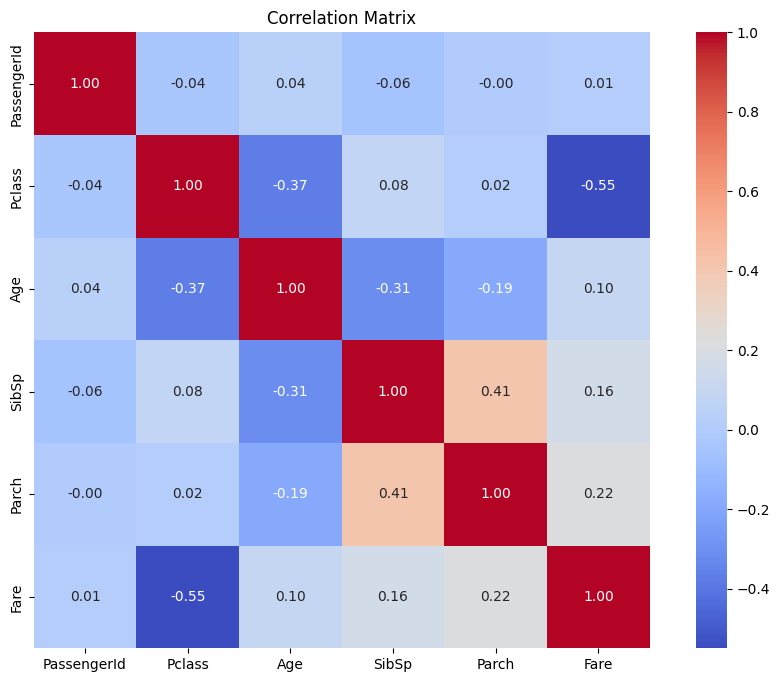

Correlation between Age and Fare: 0.10


TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('E:/桌面/python/NonGradedEX5/titanic.csv')

print("Data types before cleaning:")
print(df[['Age', 'Fare']].dtypes)

print("Unique values in 'Age':")
print(df['Age'].unique())
print("Unique values in 'Fare':")
print(df['Fare'].unique())

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

print("NaN values after conversion:")
print(df[['Age', 'Fare']].isnull().sum())

correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

age_fare_correlation = df['Age'].corr(df['Fare'])
print(f'Correlation between Age and Fare: {age_fare_correlation:.2f}')

age_survived_correlation = df['Age'].corr(df['Survived'])
print(f'Correlation between Age and Survived: {age_survived_correlation:.2f}')

fare_survived_correlation = df['Fare'].corr(df['Survived'])
print(f'Correlation between Fare and Survived: {fare_survived_correlation:.2f}')

df['Family_Size'] = df['SibSp'] + df['Parch']  # Ensure Family_Size is calculated
family_survived_correlation = df['Family_Size'].corr(df['Survived'])
print(f'Correlation between Family Size and Survived: {family_survived_correlation:.2f}')

pclass_survived_correlation = df['Pclass'].corr(df['Survived'])
print(f'Correlation between Pclass and Survived: {pclass_survived_correlation:.2f}')
